In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [176]:
data = pd.read_csv(r"C:\Users\Asus-PC12\Desktop\incl.csv", index_col=False)

In [177]:
# data.head()

In [178]:
data['cos(incl)'] = np.cos(data['inclination'] * np.pi/180)
data['sin(incl)'] = np.sin(data['inclination'] * np.pi/180)
data['cos(az)'] = np.cos(data['azimuth'] * np.pi/180)
data['sin(az)'] = np.sin(data['azimuth'] * np.pi/180)

In [179]:
# data['delta_depth'] = data['depth'] * data['cos(incl)']

In [180]:
data['delta_depth'] = ((data['depth'] - data['depth'].shift(1)).fillna(0)) * data['cos(incl)']
# data.head()

In [181]:
data['TVD'] = data['delta_depth'].cumsum()

In [182]:
# North = MD * sin(i) * cos(az)
# East = MD * sin(i) * sin(az)
# TVD = MD * cos(i)

In [183]:
data['North'] = data['TVD'] * data['sin(incl)'] * data['cos(az)']
data['East'] = data['TVD'] * data['sin(incl)'] * data['sin(az)']

In [184]:
# data.head()
data['North_max'] = data['North'].max()
data['East_min'] = data['East'].min()
data['TVD_max'] = data['TVD'].max()

In [185]:
# z = data['depth']
z = data['TVD']
# y = data['inclination']
# x = data['azimuth']
x = data['East']
y = data['North']
x1 = data['North_max']
y1 = data['East_min']
z1 = data['TVD_max']

In [186]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

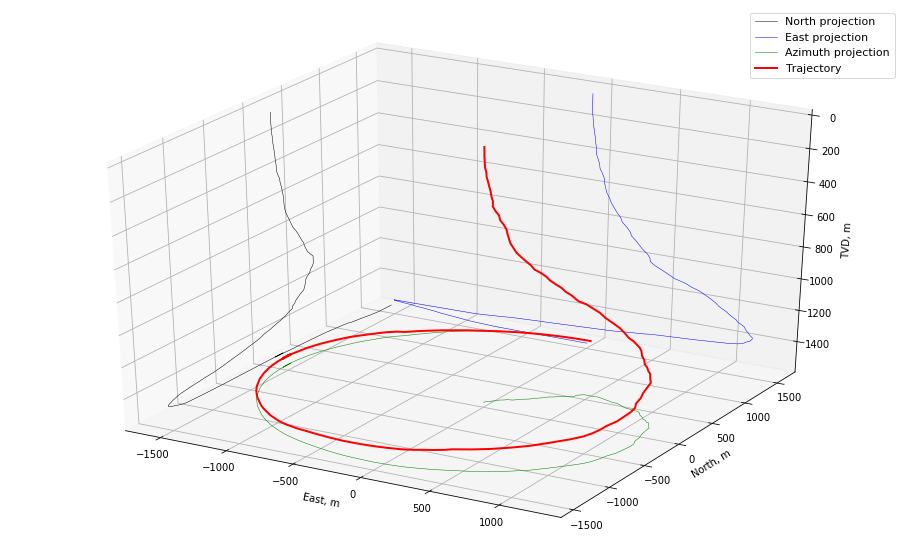

In [187]:
mpl.rcParams['legend.fontsize'] = 11

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')
ax.plot(-x1, y, z, label='North projection', color='black', lw=0.5)
ax.plot(x, -y1, z, label='East projection',color='blue', lw=0.5)
ax.plot(x, y, z1, label='Azimuth projection',color='green', lw=0.5)
ax.plot(x, y, z, label='Trajectory', color='red', lw=2)
ax.set_xlabel('East, m')
ax.set_ylabel('North, m')
ax.set_zlabel('TVD, m')
ax.invert_zaxis()
# ax.invert_xaxis()
# ax.invert_yaxis()
ax.legend()

plt.show()


In [188]:
# data.head(), data.shape

In [189]:
# VME
# axial load, thread connection, pipe body
# RIH / POOH loads
# friction
# bending, balooning, outer/inner pressures effects
# temperature effects (elongation => force), distributed temperature
# packer loads

In [190]:
specific_weight = 15.2 # kg/m
wt = 7.34 # mm
OD = 88.9 # mm
bf = 0.86
A = 0.785 * (OD**2 - (OD - 2 * wt)**2) / 1000000 # m2
rho = 1.10 # sg, g/sm3
g = 9.81 # m/s2
E = 200e9 # Pa

In [191]:
h = data['TVD'].max()

In [192]:
P = g * 1100 * h 
F = P * A / 9.81

In [193]:
Loads = pd.DataFrame(data['TVD']*specific_weight)

In [194]:
Loads['Weight_in_Fluid'] = data['TVD'] * bf * specific_weight
# Loads.head()

In [195]:
Loads.rename(columns={'TVD':'Weight_on_Air'})
Loads['TVD'] = data['TVD']
Loads['Weight_on_Air'] = Loads['TVD'] * specific_weight
# Loads.head()

In [196]:
Loads['W_i_F'] = Loads['Weight_on_Air'] - F

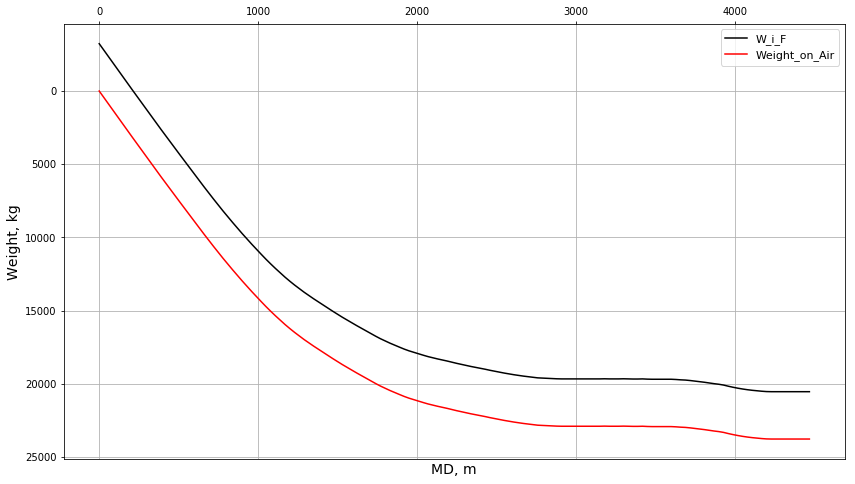

In [197]:
plt.figure(figsize=(14,8))

plt.plot(data['depth'], Loads['W_i_F'], color='k')
plt.plot(data['depth'], Loads['Weight_on_Air'], color='red')
# plt.plot(data['depth'], Loads['Weight_in_Fluid'],color='blue')

plt.legend()
plt.ylabel('Weight, kg', fontsize=14)
plt.xlabel('MD, m', fontsize=14)

plt.gca().xaxis.tick_top()
plt.gca().invert_yaxis()

plt.grid()
plt.show()

In [198]:
friction_factor_1 = 0.3
friction_factor_2 = 0.2

In [199]:
Loads['Outstep'] = data['depth'] * data['sin(incl)']

In [200]:
Loads['Pull_0.3'] = Loads['W_i_F'] + Loads['Outstep'] * friction_factor_1 * specific_weight
Loads['Pull_0.2'] = Loads['W_i_F'] + Loads['Outstep'] * friction_factor_2 * specific_weight
Loads['RIH_0.3'] = Loads['W_i_F'] - Loads['Outstep'] * friction_factor_1 * specific_weight
Loads['RIH_0.2'] = Loads['W_i_F'] - Loads['Outstep'] * friction_factor_2 * specific_weight

In [201]:
# plt.figure(figsize=(14,8))

# plt.plot(Loads['Pull_0.3'], data['depth'], color='red', label='Pull_0.3')
# plt.plot(Loads['RIH_0.3'], data['depth'], color='blue', label='RIH_0.3')

# plt.plot(Loads['Pull_0.2'], data['depth'], color='green', label='Pull_0.2')
# plt.plot(Loads['RIH_0.2'], data['depth'], color='k', label='RIH_0.2')

# plt.plot(Loads['W_i_F'], data['depth'], color='y', label='Weight_in_Fluid')
# # plt.plot(Loads['Weight_in_Fluid'], data['depth'], color='y', label='Weight_in_Fluid')

# plt.legend()
# plt.xlabel('Weight, kg', fontsize=14, labelpad=15)
# plt.ylabel('MD, m', fontsize=14)

# plt.gca().xaxis.tick_top()
# plt.gca().xaxis.set_label_position('top')
# plt.gca().invert_yaxis()

# plt.grid()
# plt.show()

In [202]:
# plt.figure(figsize=(14,8))

# plt.plot(Loads['Pull_0.3'], Loads['TVD'], color='red', label='Pull_0.3')
# plt.plot(Loads['RIH_0.3'], Loads['TVD'], color='blue', label='RIH_0.3')

# plt.plot(Loads['Pull_0.2'], Loads['TVD'], color='green', label='Pull_0.2')
# plt.plot(Loads['RIH_0.2'], Loads['TVD'], color='k', label='RIH_0.2')

# plt.plot(Loads['W_i_F'], Loads['TVD'], color='y', label='Weight_in_Fluid')

# plt.legend()
# plt.xlabel('Weight, kg', fontsize=14, labelpad=15)
# plt.ylabel('TVD, m', fontsize=14)

# plt.gca().xaxis.tick_top()
# plt.gca().xaxis.set_label_position('top')
# plt.gca().invert_yaxis()

# plt.grid()
# plt.show()

In [203]:
Loads['revRIH_0.3'] = Loads['RIH_0.3'].values[::-1]
Loads['revPull_0.3'] = Loads['Pull_0.3'].values[::-1]
Loads['revRIH_0.2'] = Loads['RIH_0.2'].values[::-1]
Loads['revPull_0.2'] = Loads['Pull_0.2'].values[::-1]
Loads['revW_i_F'] = Loads['W_i_F'].values[::-1]
Loads['revW_on_A'] = Loads['Weight_on_Air'].values[::-1]
# Loads.head()

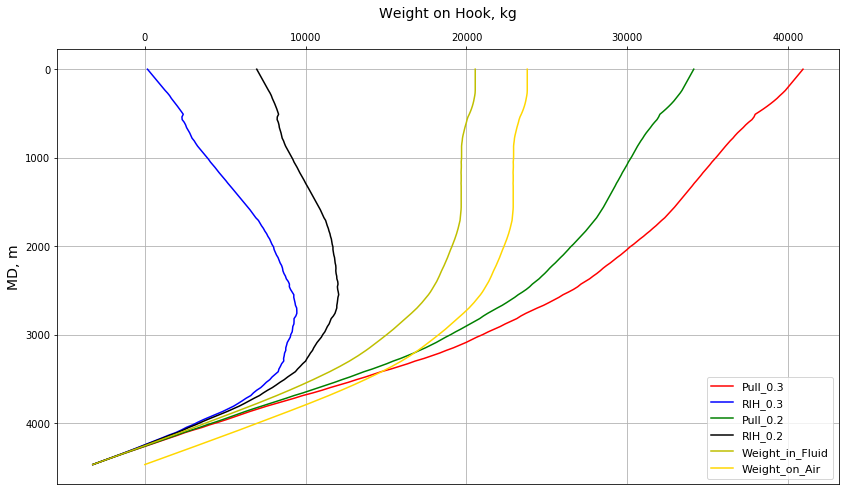

In [204]:
plt.figure(figsize=(14,8))

plt.plot(Loads['revPull_0.3'], data['depth'], color='red', label='Pull_0.3')
plt.plot(Loads['revRIH_0.3'], data['depth'], color='blue', label='RIH_0.3')

plt.plot(Loads['revPull_0.2'], data['depth'], color='green', label='Pull_0.2')
plt.plot(Loads['revRIH_0.2'], data['depth'], color='k', label='RIH_0.2')

plt.plot(Loads['revW_i_F'], data['depth'], color='y', label='Weight_in_Fluid')
plt.plot(Loads['revW_on_A'], data['depth'], color='gold', label='Weight_on_Air')

plt.legend()
plt.xlabel('Weight on Hook, kg', fontsize=14, labelpad=15)
plt.ylabel('MD, m', fontsize=14)

plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.gca().invert_yaxis()

plt.grid()
plt.show()

In [205]:
Loads['DLS'] = data['inclination'] - data['inclination'].shift(1).fillna(0)
# Loads.head()

In [206]:
# +/- sigma = +/- (E * D) / (2 R) = (E * D)/ [(2 * 360 *  delta_L)/(2 * pi * DLS )]
Loads['sigma'] = (E * OD/1000) / (360 * 30)/np.pi * Loads['DLS']
# Loads['sigma'].head()

In [207]:
Loads['Bend'] = Loads['sigma'] * A
Loads['revBend'] = Loads['Bend'].values[::-1]

In [208]:
# with bending
Loads['W_i_F_Bend_+'] = Loads['W_i_F'] + Loads['Bend']
Loads['W_i_F_Bend_-'] = Loads['W_i_F'] - Loads['Bend']

Loads['revW_i_F_Bend_+'] = Loads['W_i_F_Bend_+'].values[::-1]
Loads['revW_i_F_Bend_-'] = Loads['W_i_F_Bend_-'].values[::-1]

Loads['revRIH_0.3_B+'] = Loads['revRIH_0.3'] + Loads['revBend']
Loads['revRIH_0.3_B-'] = Loads['revRIH_0.3'] - Loads['revBend']

Loads['revPull_0.3_B+'] = Loads['revPull_0.3'] + Loads['revBend']
Loads['revPull_0.3_B-'] = Loads['revPull_0.3'] - Loads['revBend']

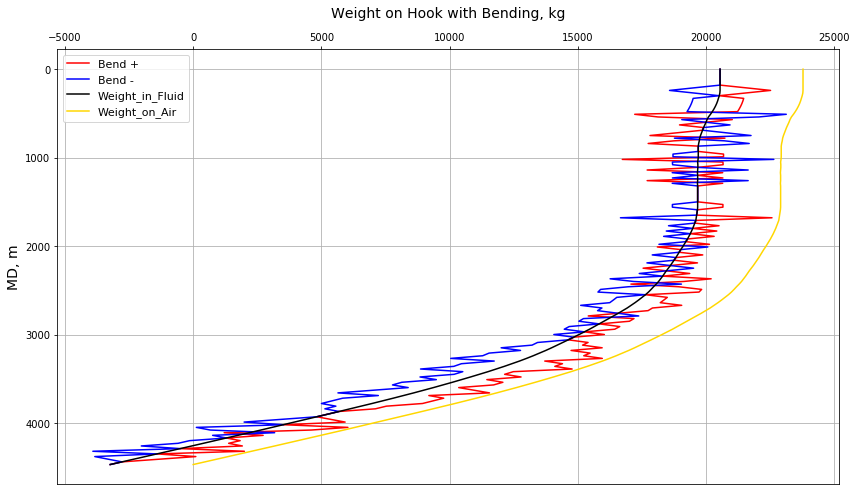

In [209]:
plt.figure(figsize=(14,8))

plt.plot(Loads['revW_i_F_Bend_+'], data['depth'], color='red', label='Bend +')
plt.plot(Loads['revW_i_F_Bend_-'], data['depth'], color='blue', label='Bend -')

plt.plot(Loads['revW_i_F'], data['depth'], color='k', label='Weight_in_Fluid')
plt.plot(Loads['revW_on_A'], data['depth'], color='gold', label='Weight_on_Air')

plt.legend()
plt.xlabel('Weight on Hook with Bending, kg', fontsize=14, labelpad=15)
plt.ylabel('MD, m', fontsize=14)

plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.gca().invert_yaxis()

plt.grid()
plt.show()

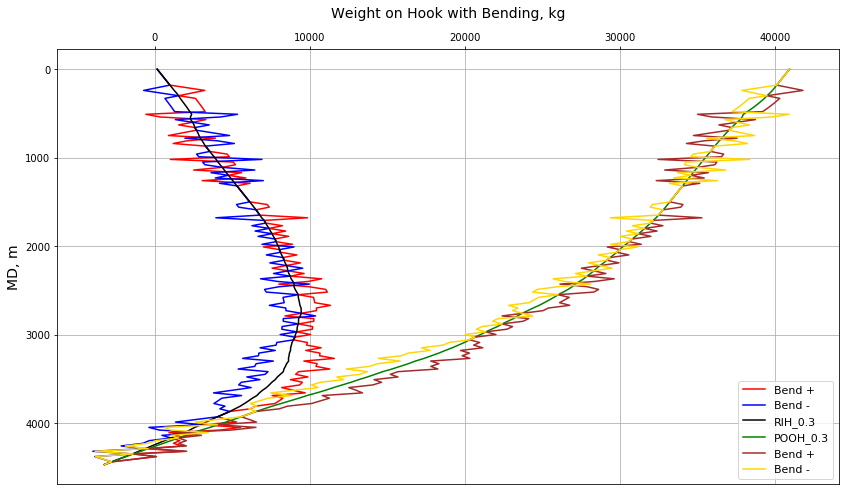

In [210]:
plt.figure(figsize=(14,8))

plt.plot(Loads['revRIH_0.3_B+'], data['depth'], color='red', label='Bend +')
plt.plot(Loads['revRIH_0.3_B-'], data['depth'], color='blue', label='Bend -')

plt.plot(Loads['revRIH_0.3'], data['depth'], color='k', label='RIH_0.3')
plt.plot(Loads['revPull_0.3'], data['depth'], color='green', label='POOH_0.3')

plt.plot(Loads['revPull_0.3_B+'], data['depth'], color='brown', label='Bend +')
plt.plot(Loads['revPull_0.3_B-'], data['depth'], color='gold', label='Bend -')

plt.legend()
plt.xlabel('Weight on Hook with Bending, kg', fontsize=14, labelpad=15)
plt.ylabel('MD, m', fontsize=14)

plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.gca().invert_yaxis()

plt.grid()
plt.show()